<a href="https://colab.research.google.com/github/gskumlehn/autism-info-llm-comparison/blob/main/sentiment_analysis_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gskumlehn/autism-info-llm-comparison.git

fatal: destination path 'autism-info-llm-comparison' already exists and is not an empty directory.


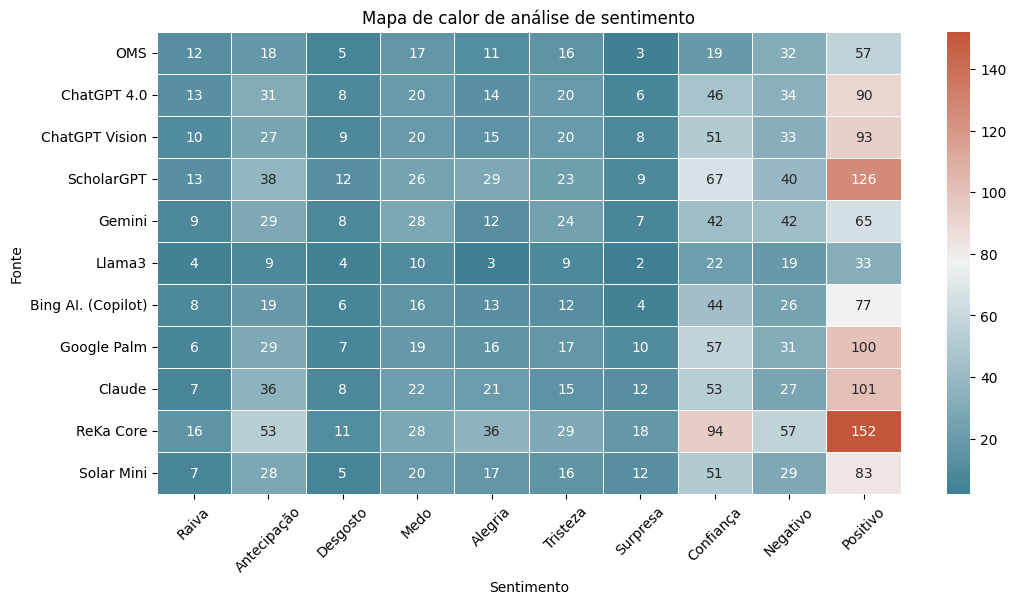

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sentiments = pd.read_csv("autism-info-llm-comparison/sentiment_analysis_results.csv")
df_sentiments.set_index("Model", inplace=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_sentiments, cmap=cmap, annot=True, fmt="d", linewidths=0.5, cbar=True)
plt.title("Mapa de calor de análise de sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Fonte")
plt.xticks(rotation=45)
plt.show()


In [3]:
df_ratio = df_sentiments[["Positivo", "Negativo"]].copy()
df_ratio["positive_negative_ratio"] = df_ratio["Positivo"] / df_ratio["Negativo"]

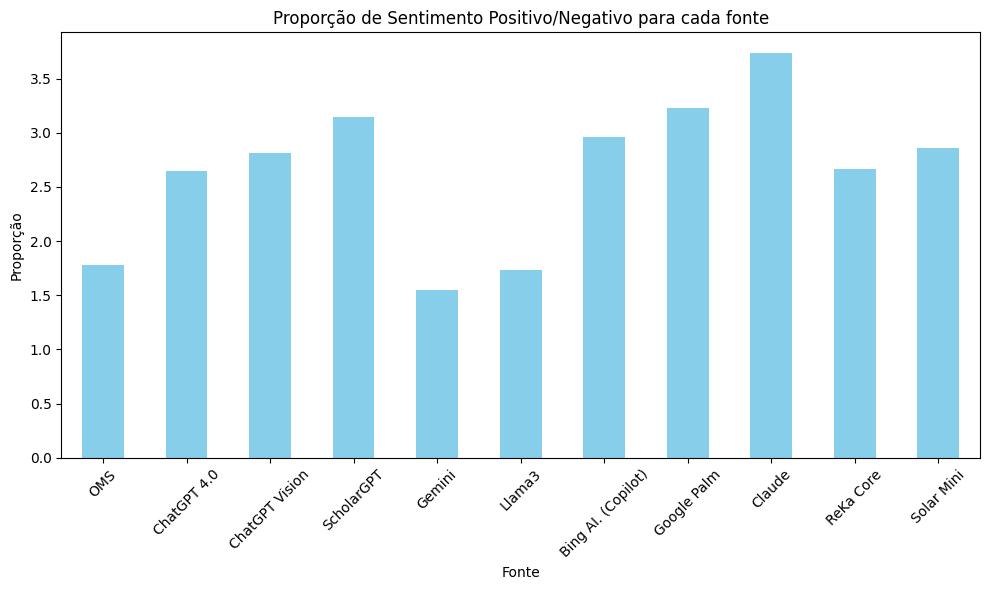

In [4]:
plt.figure(figsize=(10, 6))
df_ratio["positive_negative_ratio"].plot(kind='bar', color='skyblue')
plt.title('Proporção de Sentimento Positivo/Negativo para cada fonte')
plt.xlabel('Fonte')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
df_word_count = pd.read_csv("autism-info-llm-comparison/word_count.csv")

In [6]:
# Obter a última linha (total de palavras por modelo)
total_palavras = df_word_count.tail(1).iloc[0]
print(total_palavras)
# Garantir que o índice dos totais seja igual ao nome dos modelos no df_sentimento
# Precisamos renomear colunas e linhas para que tudo se alinhe
totais_dict = total_palavras.to_dict()

# Criar uma cópia do DataFrame de sentimentos para normalizar
df_normalizado = pd.read_csv("autism-info-llm-comparison/sentiment_analysis_results.csv")

# Normalizar colunas emocionais pelo total de palavras
colunas_emocionais = [
    'Raiva', 'Antecipação', 'Desgosto', 'Medo',
    'Alegria', 'Tristeza', 'Surpresa', 'Confiança',
    'Negativo', 'Positivo'
]

for modelo in df_normalizado['Model']:
    if modelo in totais_dict:
        divisor = totais_dict[modelo]
        df_normalizado.loc[df_normalizado['Model'] == modelo, colunas_emocionais] = (
            df_normalizado.loc[df_normalizado['Model'] == modelo, colunas_emocionais] / divisor
        )

df_normalizado.head()


OMS                                                                 54
ChatGPT 4.0                                                        222
ChatGPT Vision                                                     266
ScholarGPT                                                         263
Gemini                                                             102
Llama3                                                              63
Bing AI (Copilot)                                                   86
Google Palm                                                        264
Claude                                                             161
ReKa Core                                                          334
Solar Mini                                                         185
Média                                                       181.818182
Soma                 What is the WHO resolution on autism spectrum ...
Name: 7, dtype: object


<ipython-input-6-62465dc29690>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.22222222]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_normalizado.loc[df_normalizado['Model'] == modelo, colunas_emocionais] = (
<ipython-input-6-62465dc29690>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_normalizado.loc[df_normalizado['Model'] == modelo, colunas_emocionais] = (
<ipython-input-6-62465dc29690>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.09259259]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_normalizado.loc[df_normalizado['Model'] 

,Model,Raiva,Antecipação,Desgosto,Medo,Alegria,Tristeza,Surpresa,Confiança,Negativo,Positivo
0,OMS,0.222222,0.333333,0.092593,0.314815,0.203704,0.296296,0.055556,0.351852,0.592593,1.055556
1,ChatGPT 4.0,0.058559,0.139640,0.036036,0.090090,0.063063,0.090090,0.027027,0.207207,0.153153,0.405405
2,ChatGPT Vision,0.037594,0.101504,0.033835,0.075188,0.056391,0.075188,0.030075,0.191729,0.124060,0.349624
3,ScholarGPT,0.049430,0.144487,0.045627,0.098859,0.110266,0.087452,0.034221,0.254753,0.152091,0.479087
4,Gemini,0.088235,0.284314,0.078431,0.274510,0.117647,0.235294,0.068627,0.411765,0.411765,0.637255


ValueError: Unknown format code 'd' for object of type 'float'

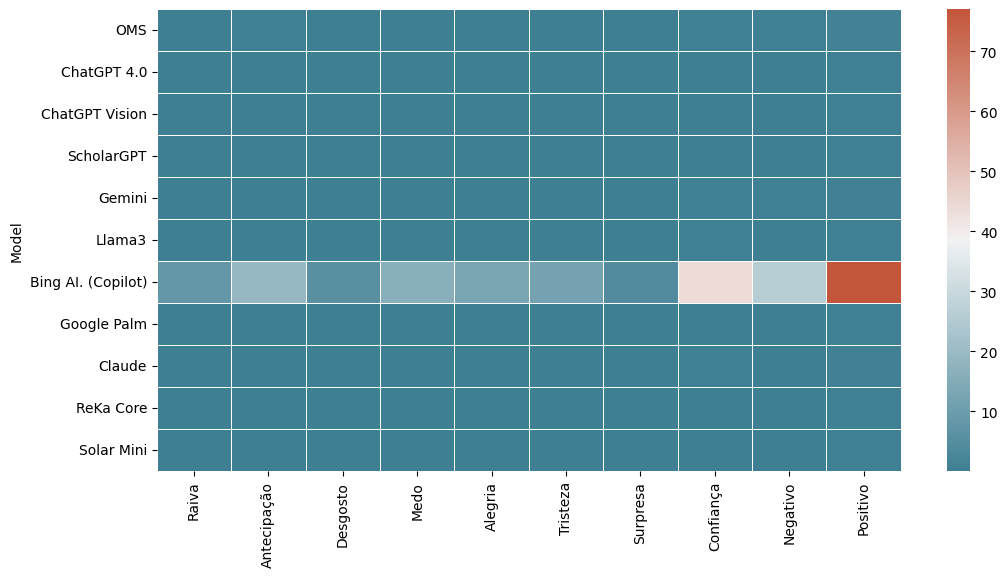

In [7]:
df_normalizado.set_index("Model", inplace=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(12, 6))
sns.heatmap(df_normalizado, cmap=cmap, annot=True, fmt="d", linewidths=0.5, cbar=True)
plt.title("Mapa de calor de análise de sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Fonte")
plt.xticks(rotation=45)
plt.show()